In [ ]:
import torch
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import itertools
from scipy.special import expit

In [ ]:
def display_data(X, y):
    plt.scatter(X[y==1,0], X[y==1,1], color='b')
    plt.scatter(X[y==0,0], X[y==0,1], color='y')
    plt.axis('equal')
    plt.show()
    
def display_model(model, X, features=None, soft=True):
    if features is None:
        features = X
    logits = model(features).detach()
    predictions = expit(logits[:,1] - logits[:,0])
    if not soft:
        predictions = (np.sign(predictions-0.5)+1)/2.0
    n = X.shape[0]
    rgb = np.zeros(shape=(n, 3))
    rgb[:,0] = 1 - predictions
    rgb[:,1] = 1 - predictions
    rgb[:,2] = predictions
    plt.scatter(X[:,0], X[:,1], color=rgb)
    plt.axis('equal')
    plt.show()

# Simple Dataset for Nonparametric Modeling
## Constructing the Dataset

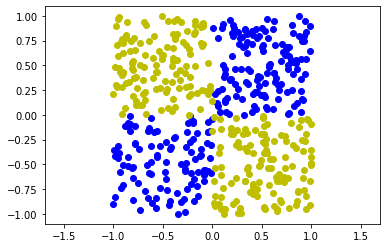

In [46]:
n = 500
X = rnd.uniform(-1, 1, size=(n, 2))
y = X[:,0]*X[:,1]>0
#y = np.abs(X[:,0] **2 + X[:,1] ** 2 - 0.6) < 0.25
display_data(X, y)

## Fit a logistic regression model
(Don't worry yet about the optimizer code; we'll get to it later)

In [ ]:
Xt = torch.tensor(X, dtype=torch.float32)
yt = torch.tensor(y, dtype=torch.int64)
model = torch.nn.Linear(2, 2)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=.01)
for epoch in range(5001):
    if epoch % 1000 == 0:
        print(epoch)
        display_model(model, Xt)
        optimizer.zero_grad()
    outputs = model(Xt)
    loss = loss_fn(outputs, yt)
    loss.backward()
    optimizer.step()

## Random features regression
Run logistic regression, but with many random features rather than the default covariates

In [ ]:
k = 100
# Features: sign(M*x + b), where M and b are random gaussian matrices
Mt = torch.tensor(rnd.randn(2,k), dtype=torch.float32)
bt = torch.tensor(rnd.randn(1,k), dtype=torch.float32)
Xt = torch.tensor(X, dtype=torch.float32)
Phit = torch.sign(Xt @ Mt + bt)
yt = torch.tensor(y, dtype=torch.int64)
model = torch.nn.Linear(k, 2)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=.01)
for epoch in range(5001):
    if epoch % 1000 == 0:
        print(epoch)
        display_model(model, Xt, features=Phit)
    optimizer.zero_grad()
    outputs = model(Phit)
    loss = loss_fn(outputs, yt)
    loss.backward()
    optimizer.step()

## Fit a two-layer neural network
Use learned instead of random features; can succeed with far fewer features than before

In [ ]:
k = 5
Xt = torch.tensor(X, dtype=torch.float32)
yt = torch.tensor(y, dtype=torch.int64)
layer1 = torch.nn.Linear(2, k)
activation = torch.nn.ReLU()
layer2 = torch.nn.Linear(k, 2)
model = lambda x : layer2(activation(layer1(x)))
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(itertools.chain(layer1.parameters(), layer2.parameters()), lr=.01)
for epoch in range(5001):
    if epoch % 1000 == 0:
        print(epoch)
        display_model(model, Xt)
    optimizer.zero_grad()
    outputs = model(Xt)
    loss = loss_fn(outputs, yt)
    loss.backward()
    optimizer.step()

# Basic Pytorch Operations

In [ ]:
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)
c = torch.tensor(4.0, requires_grad=True)
output = (a+b) * (c**2)
output

In [ ]:
output.backward()

In [ ]:
print(a.grad)
print(b.grad)
print(c.grad)